<a href="https://colab.research.google.com/github/Alicia-LB/Sales-Prediction/blob/main/Machine_Learning_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo Collab Notebooks/data/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Data-Cleaning

In [4]:
#1. How many rows and columns?

df.shape

(8523, 12)

In [5]:
#2. What are the datatypes of each variable?

data = df.dtypes
data

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
#3. Are there duplicates?
# no duplicates present

df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [7]:
#4. Identify missing values.
#Item_Weight & Outlet_Size are the columns that have missing values

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#5 Decide on how to address the missing values
#Can't really take those nans out becasue they correlate with a lot of the other columns: i.e.- find the correlation or use placeholders
#Went with placeholders as it was a simpler approach for now

#df['Outlet_Size'].fillna('Missing', inplace = True)
#df

In [9]:
#Did placeholders for item_weight as well
#I would have done 0 or the most frequent numbers, but with each item_weight pertaining to a specific identifier and item type, 
#I didn't see those to be fit

#missing_numeric = df['Item_Weight'].mean()
#missing_numeric
#df['Item_Weight'].fillna( missing_numeric, inplace = True)
#df

In [10]:
#6. Confirm that there are no missing values after addressing them.
#Tested to see if the nans were equal to 0 for the meantime

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#7.  Find and fix any inconsistent categories of data

str_cols = data[data == 'object']
str_cols.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [12]:
#Looped through every column with vaule counts to see all the strings easier 
#Noticed with the Item_Fat_Content the LF, reg, and low fat should only be either Low Fat or Regular

for col in str_cols.index:
  print(f"**{col}:")
  print(df[col].value_counts())
  print("\n\n")

**Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



**Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



**Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



**Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

In [13]:
#Need to replace the LF, reg, and low fat to Low Fat or Regular using replace
#check data changed with value counts of that column

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
#8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#Statistical Analyses

In [15]:
sns.set_context('paper')

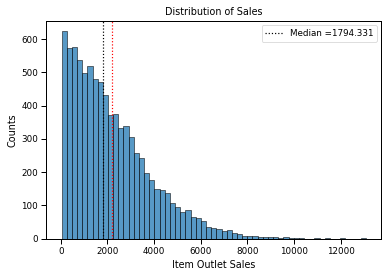

In [16]:
#Histogram to view the distributions of various features in your dataset.

ax = sns.histplot(data=df,x='Item_Outlet_Sales')
median = df['Item_Outlet_Sales'].median()
ax.axvline(median, color='k',ls=":",
            label=f"Median ={median}")
ax.axvline(df['Item_Outlet_Sales'].mean(), color='red',ls=":")
ax.legend();
ax.set(xlabel="Item Outlet Sales", ylabel="Counts",title= "Distribution of Sales");

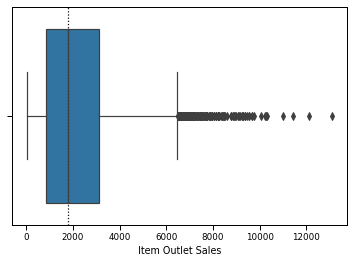

In [17]:
#Boxplot to view statistical summaries of various features in your dataset.
ax = sns.boxplot(data=df, x='Item_Outlet_Sales')
median = df['Item_Outlet_Sales'].median()

ax.axvline(median, color='k',ls=":",
            label=f"Median ={median}");
ax.set(xlabel="Item Outlet Sales");

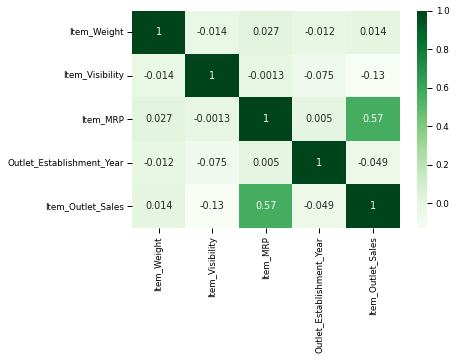

In [18]:
#Heatmap of the correlation between features.

corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

#Explanatory Data Analyses

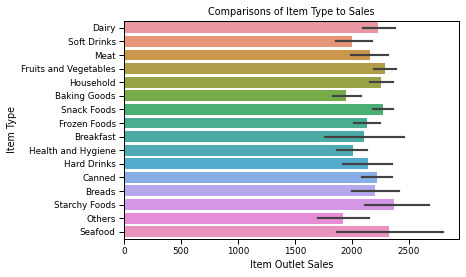

In [19]:
#Item type and item sales
#Whats the comparison between item type and item sales? - bar chart

fig, axes = plt.subplots(nrows = 1, ncols = 1);
axes = sns.barplot(x='Item_Outlet_Sales', y='Item_Type', data = df)
axes.set_xlabel('Item Outlet Sales')
axes.set_ylabel('Item Type')
axes.set_title('Comparisons of Item Type to Sales');

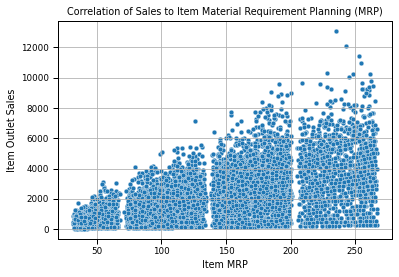

In [20]:
#item mrp and item sales
#Is there a correlation between item weight and item sales? - scatter plot

fig, axes = plt.subplots(nrows = 1, ncols = 1);
sns.scatterplot(data = df, x ='Item_MRP', y='Item_Outlet_Sales');
axes.set_ylabel('Item Outlet Sales')
axes.set_xlabel('Item MRP')
axes.set_title('Correlation of Sales to Item Material Requirement Planning (MRP)');
axes.grid()

#Preprocessing/Modeling

In [21]:
#Imports for machine learning

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_spli
from sklearn import set_config
set_config(display='diagram')

In [22]:
#Did .info to see which columns are objects and numbers and how many missing values I have again

print(df.info(), '\n')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 



Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
#Outlet Size is ordinal, so it needs to be changed to numeric form for machine learning to process

df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [24]:
#Replaced the ordinal values with numbers to make it float

replacement_dict = {'High':2, 'Medium':1, 'Small':0 }
df['Outlet_Size'].replace(replacement_dict, inplace = True)
df['Outlet_Size']

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

In [25]:
#Validation Split

X = df.drop(columns = ['Item_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
#Instantiating column Selectors

cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [27]:
#Instantiating simpleimputer for missing values. Using the ‘mean’ strategy for numeric columns and the ‘most_frequent’ strategy for categorical columns.

freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

In [28]:
#Instantiating One-hot-encoder for the nominal features.

ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [29]:
#Instantiating standardscaler to scale the numeric columns.

scaler = StandardScaler()

In [30]:
#Instantiating numeric piplines

numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [31]:
#Instantiating categorical piplines

categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [32]:
#Instantiating columntransformer

num_tuple =(numeric_pipe, num_selector)
cat_tuple =(categorical_pipe, cat_selector)
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0552887d10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0552887750>)])

In [33]:
#All preprocessing steps contained within a single preprocessing object.
#Using preprocessing object to transform data appropriately, avoiding data leakage, to make it ready for modeling. 

preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 40)




In [34]:
X_train_processed

array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [35]:
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.817249,-0.712775,1.828109,1.327849,0.407785,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,-1.291052,0.603369,1.327849,0.407785,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.813319,0.244541,0.136187,0.407785,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-1.004931,-0.952591,0.732018,-1.291630,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.965484,-0.336460,0.493686,0.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree


In [36]:
def evaluation_model(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)
  print(f'MAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

In [39]:
dummy = DummyRegressor(strategy='mean')
dummy_pipe = make_pipeline(preprocessor, dummy)
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0552887d10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0552887750>)])),
                ('dummyregressor', DummyRegressor())])

In [40]:
print('Baseline Model Training Scores')
evaluation_model(y_train, dummy_pipe.predict(X_train))
print('\n')
print('Baseline Model Testing Scores')
evaluation_model(y_test, dummy_pipe.predict(X_test))

Baseline Model Training Scores
MAE: 1,360.22 
MSE: 2,959,455.70 
RMSE: 1,720.31 
R2: 0.00


Baseline Model Testing Scores
MAE: 1,326.12 
MSE: 2,772,144.46 
RMSE: 1,664.98 
R2: -0.00


In [41]:
reg = LinearRegression()
reg.fit(X_train_processed,y_train)

LinearRegression()

In [42]:
train_score = reg.score(X_train_processed, y_train)
test_score = reg.score(X_test_processed, y_test)

In [43]:
train_preds = reg.predict(X_train_processed)
test_preds = reg.predict(X_test_processed)

In [44]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

In [45]:
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

In [46]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

In [47]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [49]:
print('Linear Regression Model Training Scores')
print(f'MAE: {mae_train}') 
print(f'MSE: {mse_train}') 
print(f'RMSE:  {rmse_train}') 
print(f'R2: {r2_train}') 
print('\n')
print('Linear Regression Model Testing Scores')
print(f'MAE: {mae_test}') 
print(f'MSE: {mse_test}') 
print(f'RMSE:  {rmse_test}') 
print(f'R2: {r2_test}')

Linear Regression Model Training Scores
MAE: 847.1293413055382
MSE: 1297559.3424868223
RMSE:  1139.1046231522469
R2: 0.5615547343715352


Linear Regression Model Testing Scores
MAE: 804.1245935593618
MSE: 1194354.7460799548
RMSE:  1092.865383329509
R2: 0.5671023638511179


In [51]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [52]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [53]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.20006883468933223


In [54]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [55]:
dec_tree.get_depth()

40

In [56]:
dec_tree.get_n_leaves()

6281

In [58]:
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train_processed, y_train)
train_2_score = dec_tree_2.score(X_train_processed, y_train)
test_2_score = dec_tree_2.score(X_test_processed, y_test)
print(train_2_score)
print(test_2_score)

0.43164096170474664
0.4337775044707164


In [59]:
dec_tree_30 = DecisionTreeRegressor(max_depth = 30, random_state = 42)
dec_tree_30.fit(X_train_processed, y_train)
train_30_score = dec_tree_15.score(X_train_processed, y_train)
test_30_score = dec_tree_15.score(X_test_processed, y_test)
print(train_15_score)
print(test_15_score)

0.9959094690466811
0.1846417534919923


In [60]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 40)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

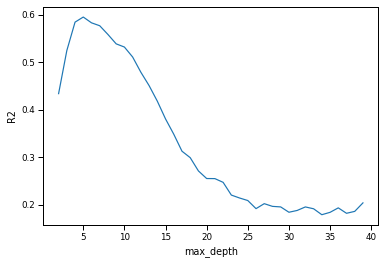

In [61]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [63]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(train_5_score)
print(test_5_score)

0.6039397477322958
0.5947099753159972


In [64]:
print('Tuned Training Scores')
evaluation_model(y_train, dec_tree_5.predict(X_train_processed))
print('\n')
print('Tuned Testing Scores')
evaluation_model(y_test, dec_tree_5.predict(X_test_processed))

Tuned Training Scores
MAE: 762.61 
MSE: 1,172,122.77 
RMSE: 1,082.65 
R2: 0.60


Tuned Testing Scores
MAE: 738.32 
MSE: 1,118,185.97 
RMSE: 1,057.44 
R2: 0.59
